In [1]:
!pip install networkx
!pip install numpy
!pip install matplotlib
!pip install scipy

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr
import seaborn as sns
from collections import Counter

In [3]:
sys.setrecursionlimit(10000)

# we want to model some graphs
* Stationary model
* Monte-Carlo : to calculate the available parameters in some types of graphs (simulate 100 to 1000 times for accept or reject a soluiton)
* It is not dependent on time

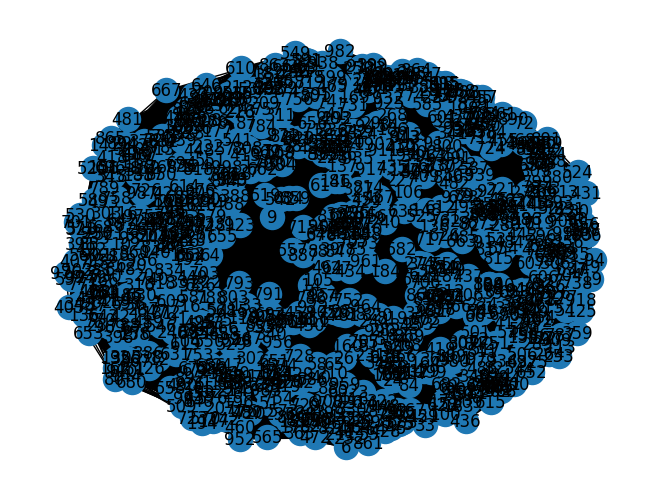

In [20]:
# create er graph
n = 1000  # Number of nodes
p = 0.5   # Probability of an edge between any two nodes

er_graph = nx.gnp_random_graph(n, p)

nx.draw(er_graph, with_labels=True)
plt.show()

mean 499.881


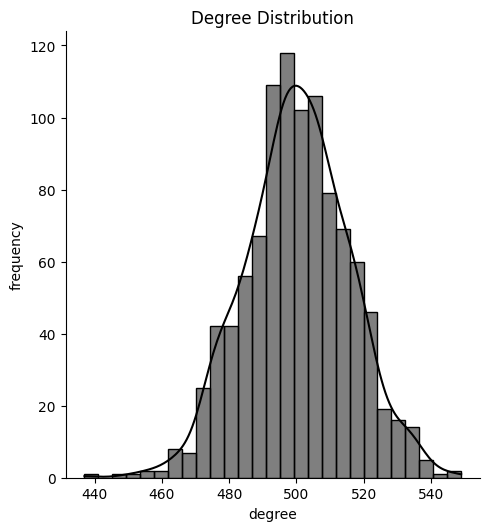

In [5]:
      
gr.draw_degree_distribution(er_graph)
print(f"mean {np.average(er_graph.degree)}")

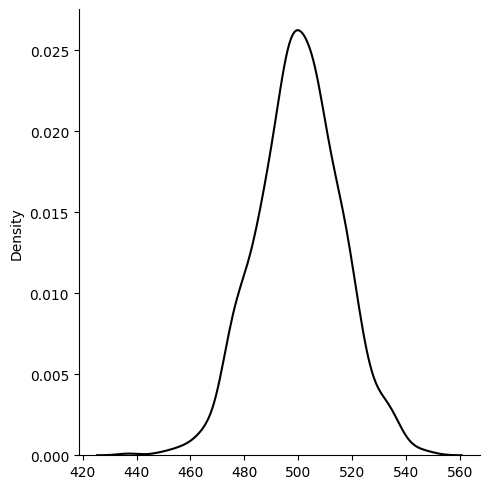

In [17]:
degrees = [d for n, d in er_graph.degree()]
sns.displot(degrees, kind="kde", color="black")

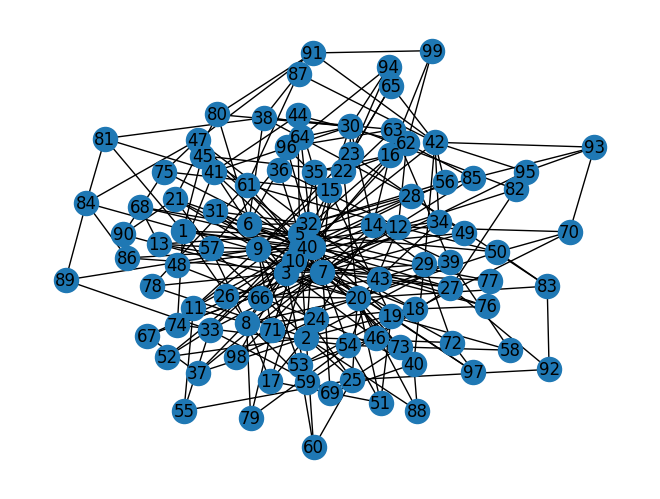

In [7]:
n = 100
m = 3
sf_graphs = []

sf_graph = nx.barabasi_albert_graph(n, m)

nx.draw(sf_graph, with_labels=True)
plt.show()

mean 27.66


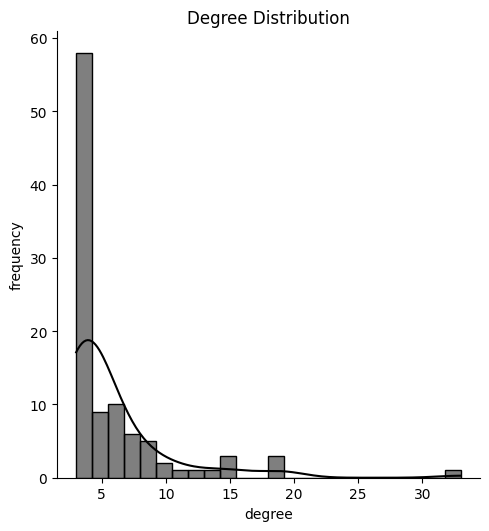

In [8]:
gr.draw_degree_distribution(sf_graph)
print(f"mean {np.average(sf_graph.degree)}")

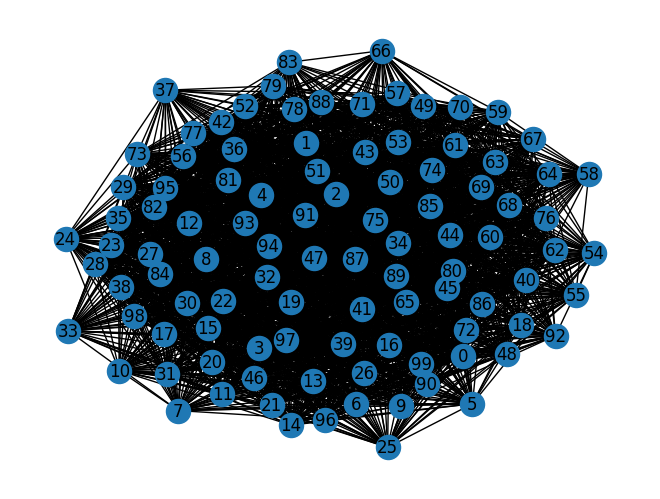

In [19]:
n = 100
k = 50
p = 0.5

wa_graph = nx.watts_strogatz_graph(n, k, p)

nx.draw(wa_graph, with_labels=True)
plt.show()

mean 49.75


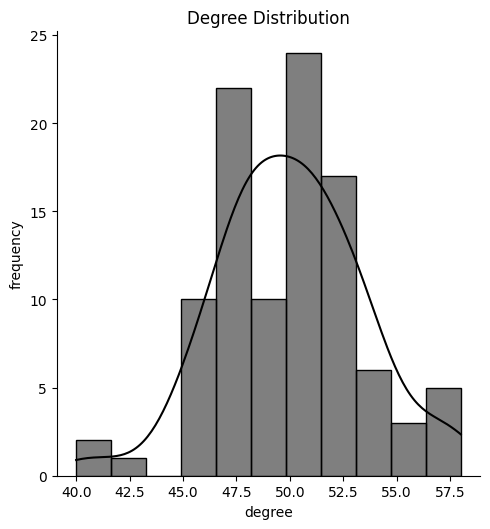

In [10]:
gr.draw_degree_distribution(wa_graph)
print(f"mean {np.average(wa_graph.degree)}")

In [11]:
# crate 100 ER graph with size between 100 to 1000
number_of_simulation = 100
p = 0.5
er_graphs = [] # ER graph dataset
for i in range(number_of_simulation):
    n = random.randint(100, 1000)
    er_graphs.append(nx.gnp_random_graph(n, p))

In [12]:
# crate 100 SF graph with size between 100 to 1000
number_of_simulation = 100
m = 50
sf_graphs = [] # sr graph dataset
for i in range(number_of_simulation):
    n = random.randint(100, 1000)
    sf_graphs.append(nx.barabasi_albert_graph(n, m))

In [13]:
# crate 100 watts strogatz graph with size between 100 to 1000
number_of_simulation = 100
k = 50
p = 0.3
wa_graphs = [] # watts strogatz graph dataset
for i in range(number_of_simulation):
    n = random.randint(100, 1000)
    wa_graphs.append(nx.watts_strogatz_graph(n, k, p))

# compare ER, SF, Watts-Strogatz Algebratic Connectivity
### ER > SF > Watts-Strogatz

In [14]:
number_of_simulation = 10
sf_algebraic_connectivity = []
er_algebraic_connectivity = []
wa_algebraic_connectivity = []

for i in range(number_of_simulation):
    sf_algebraic_connectivity.append(gr.algebraic_connectivity(sf_graphs[i]))
    er_algebraic_connectivity.append(gr.algebraic_connectivity(er_graphs[i]))
    wa_algebraic_connectivity.append(gr.algebraic_connectivity(wa_graphs[i]))

print(f"er algebratic connectivity {np.average(er_algebraic_connectivity)}")
print(f"sf algebratic connectivity {np.average(sf_algebraic_connectivity)}")
print(f"watts strogatz algebratic connectivity {np.average(wa_algebraic_connectivity)}")


er algebratic connectivity 234.74289071470002
sf algebratic connectivity 43.94019675303
watts strogatz algebratic connectivity 16.92806294623


# compare ER, SF, Watts-Strogatz Spectral Gap

### ER > SF > Watts-Strogatz

In [15]:
number_of_simulation = 10
sf_spectral_gap = []
er_spectral_gap = []
wa_spectral_gap = []

for i in range(number_of_simulation):
    sf_spectral_gap.append(gr.spectral_gap(sf_graphs[i]))
    er_spectral_gap.append(gr.spectral_gap(er_graphs[i]))
    wa_spectral_gap.append(gr.spectral_gap(wa_graphs[i]))

print(f"er spectral gap {np.average(er_spectral_gap)}")
print(f"sf spectral gap {np.average(sf_spectral_gap)}")
print(f"watts strogatz spectral gap {np.average(wa_spectral_gap)}")

er spectral gap 250.62929141157997
sf spectral gap 99.28292915483
watts strogatz spectral gap 17.295315438510002


# compare ER, SF, Watts-Strogatz Natural Connectivity

ER > SF > Watts-Strogatz

In [16]:
number_of_simulation = 10
sf_natural_connectivity = []
er_natural_connectivity = []
wa_natural_connectivity = []

for i in range(number_of_simulation):
    sf_natural_connectivity.append(gr.natural_connectivity(sf_graphs[i]))
    er_natural_connectivity.append(gr.natural_connectivity(er_graphs[i]))
    wa_natural_connectivity.append(gr.natural_connectivity(wa_graphs[i]))

print(f"er natural connectivity {np.average(er_natural_connectivity)}")
print(f"sf natural connectivity {np.average(sf_natural_connectivity)}")
print(f"watts strogatz natural connectivity {np.average(wa_natural_connectivity)}")

er natural connectivity 266.30743753836
sf natural connectivity 110.25357358794
watts strogatz natural connectivity 44.06613383580001
